In [236]:
#importing essential Libraries
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [238]:
#importing data 
df= pd.read_csv("C://Users//Aaryan//Documents//Data Science (live test)//13-7-2024//Test_Sales_LinReg.csv")
df

,Republic,NDTV,TV5,TV9,AajTak,sales
0,8.7,48.9,4.0,75.0,49.0,7.2
1,57.5,32.8,65.9,23.5,57.5,11.8
2,120.2,19.6,7.2,11.6,18.5,13.2
3,8.6,2.1,46.0,1.0,2.6,4.8
4,199.8,2.6,52.9,21.2,2.9,10.6
...,...,...,...,...,...,...
300,286.0,13.9,35.2,3.7,13.9,15.9
301,18.7,12.1,23.7,23.4,18.7,6.7
302,39.5,41.1,17.6,5.8,39.5,10.8
303,75.5,10.8,8.3,6.0,75.5,9.9


In [240]:
# Checking for Missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Republic  295 non-null    float64
 1   NDTV      300 non-null    float64
 2   TV5       305 non-null    float64
 3   TV9       297 non-null    float64
 4   AajTak    300 non-null    float64
 5   sales     305 non-null    float64
dtypes: float64(6)
memory usage: 14.4 KB


In [242]:
#Checking for null value
null = pd.isnull(df)
missing_values_count = null.sum()
print("Count of missing values :\n", missing_values_count)

Count of missing values :
 Republic    10
NDTV         5
TV5          0
TV9          8
AajTak       5
sales        0
dtype: int64


In [244]:
# Data Filtering

median_republic = math.floor(df.Republic.median())
df.Republic=df.Republic.fillna(median_republic)

median_ndtv=math.floor(df.NDTV.median())
df.NDTV=df.NDTV.fillna(median_ndtv)

median_tv5=math.floor(df.TV5.median())
df.TV5=df.TV5.fillna(median_tv5)

median_tv9=math.floor(df.TV9.median())
df.TV9=df.TV9.fillna(median_tv9)

median_aajtak=math.floor(df.AajTak.median())
df.AajTak=df.AajTak.fillna(median_aajtak)

In [246]:
#Checking for null value
null = pd.isnull(df)
missing_values_count = null.sum()
print("Count of missing values :\n", missing_values_count)

Count of missing values :
 Republic    0
NDTV        0
TV5         0
TV9         0
AajTak      0
sales       0
dtype: int64


In [248]:
#discribing df
df.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,148.164918,22.319344,29.459344,28.708852,23.476689,13.811475
std,85.881937,14.660854,20.290023,21.148409,15.726134,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,75.100000,9.300000,15.900000,11.000000,10.100000,10.300000
50%,149.000000,21.000000,26.200000,23.200000,21.100000,12.800000
75%,220.300000,35.600000,39.600000,41.800000,36.800000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


C:\Users\Aaryan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aaryan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aaryan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aaryan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

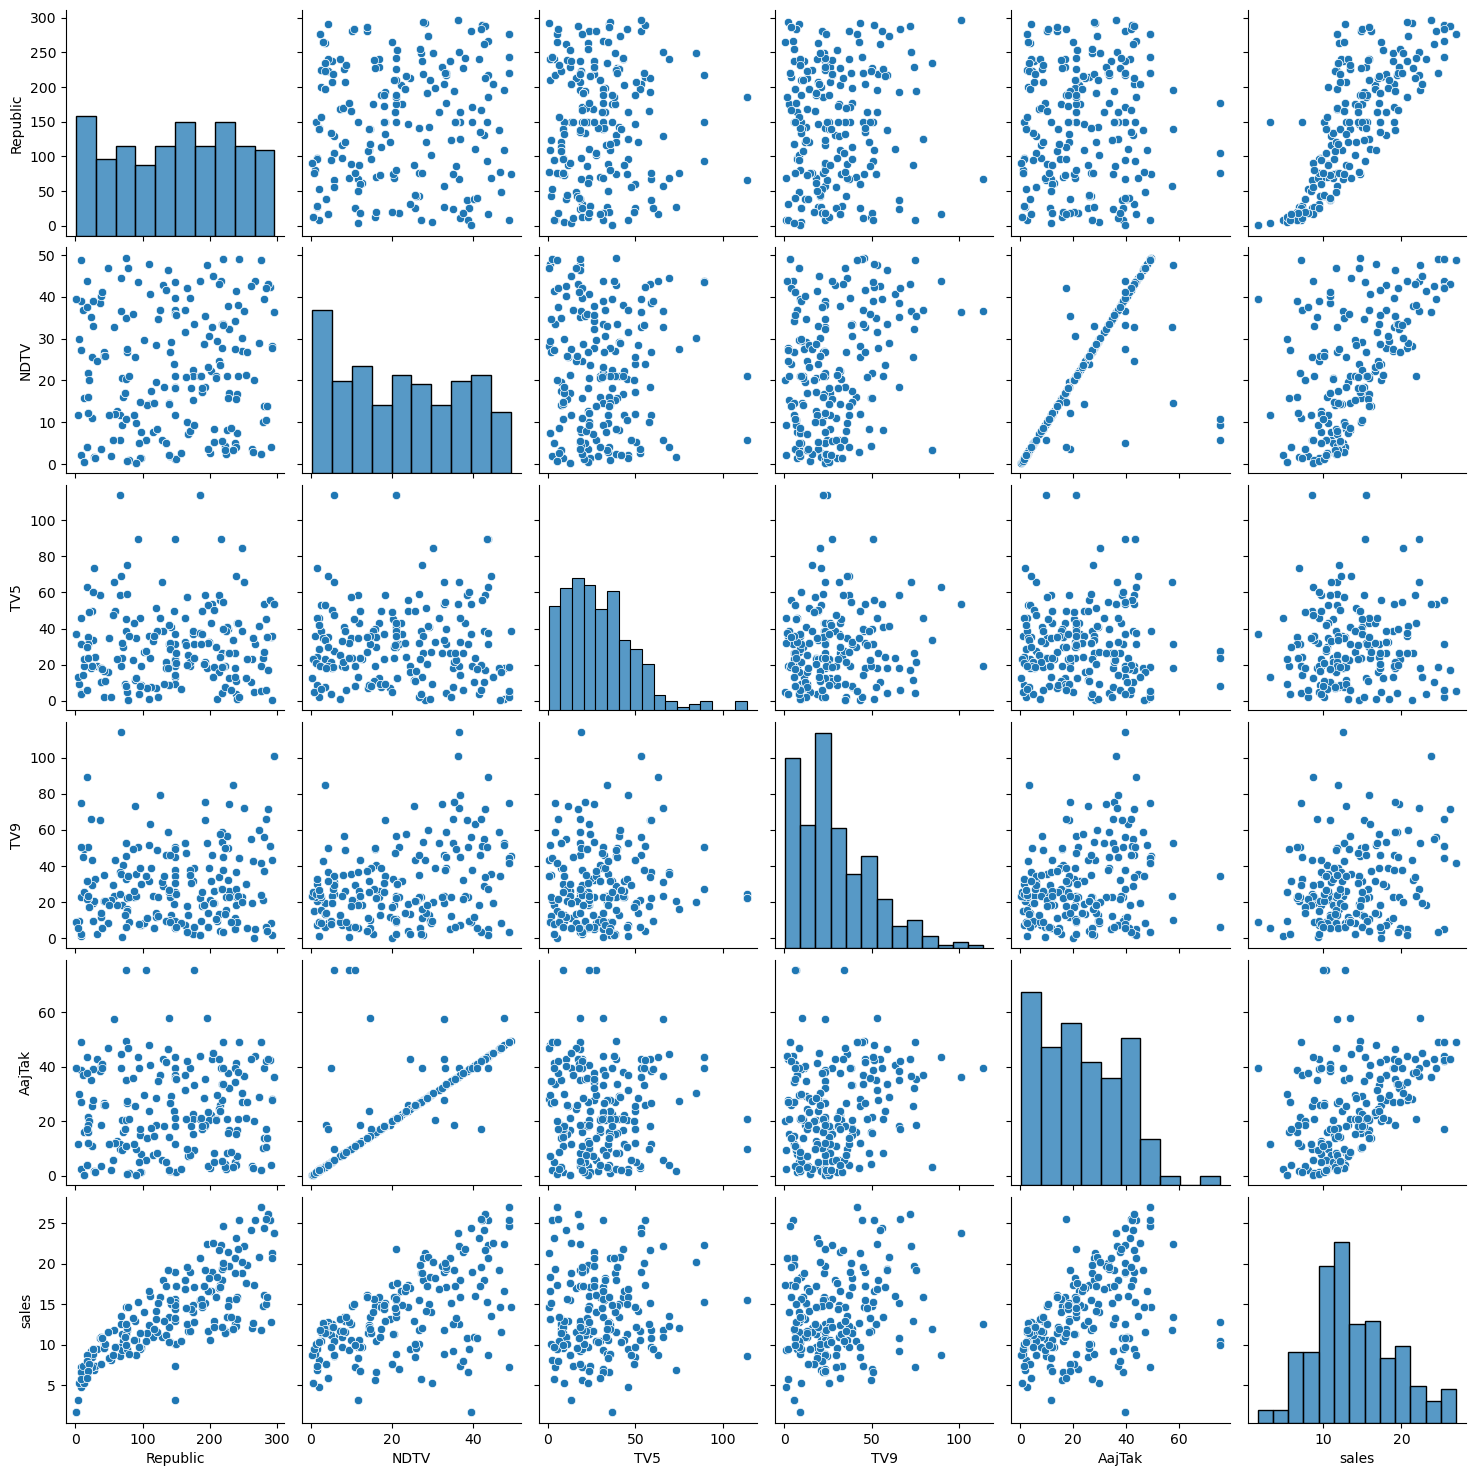

In [250]:
#Assertioning Data
sns.pairplot(df)

C:\Users\Aaryan\AppData\Local\Temp\ipykernel_10476\2024542707.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sales'])
C:\Users\Aaryan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sales', ylabel='Density'>

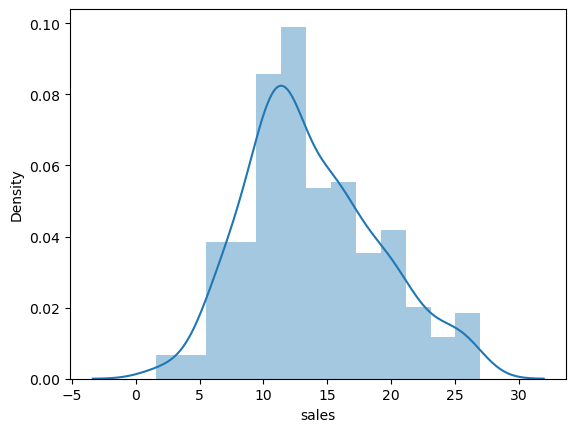

In [251]:
#Assertioning Sales
sns.distplot(df['sales'])

<Axes: >

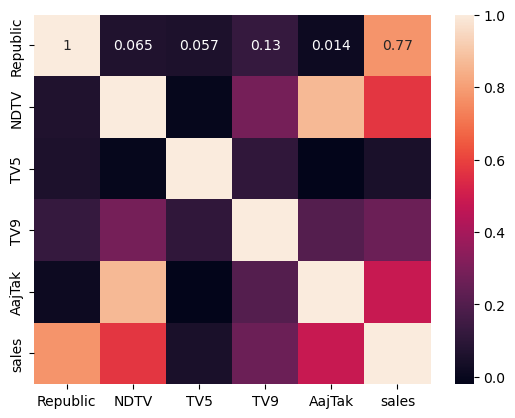

In [252]:
#checking heat map
sns.heatmap(df.corr(), annot=True)

In [253]:
#deviding data for training
x = df[['Republic',	'NDTV',	'TV5',	'TV9',	'AajTak']]
y = df['sales']

In [254]:
#training 1
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [255]:
#training 2
lm = LinearRegression()

In [256]:
#training 3
lm.fit(X_train,y_train)

LinearRegression()

In [257]:
#training 4
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

In [258]:
#inspecting results
print(lm.intercept_)

2.8873969312967347


In [259]:
#checking for coefficents
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Republic,0.045829
NDTV,0.158452
TV5,0.001251
TV9,0.001645
AajTak,0.019983


In [260]:
predictions = lm.predict(X_test)

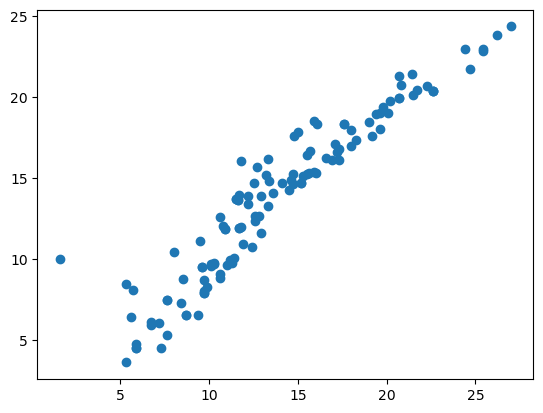

In [261]:
plt.scatter(y_test,predictions)

C:\Users\Aaryan\AppData\Local\Temp\ipykernel_10476\1274012502.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);
C:\Users\Aaryan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


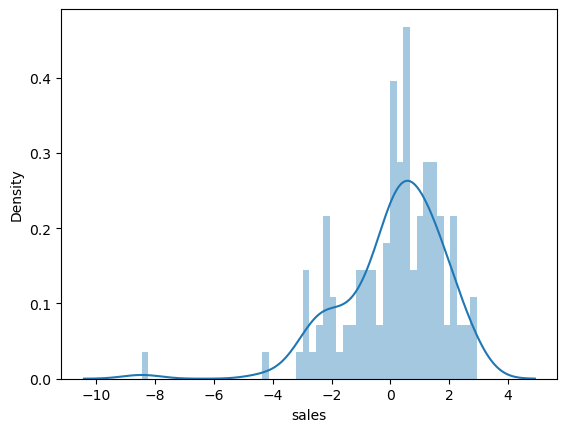

In [262]:

sns.distplot((y_test-predictions),bins=50);

In [263]:
#cheking Acurecy
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.2963319240898954
MSE: 2.9093306143422124
RMSE: 1.7056759992279344
